<a href="https://colab.research.google.com/github/avinash-marsdevs/infra-diagrams-workaround/blob/main/Afto_azure_infra_diagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install diagrams


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 49.7 MB/s eta 0:00:00


In [ ]:
from diagrams import Diagram, Cluster
from diagrams.azure.compute import AppServices
from diagrams.azure.compute import ContainerRegistries
from diagrams.azure.identity import ActiveDirectory
from diagrams.azure.security import KeyVaults
from diagrams.azure.devops import Pipelines
from diagrams.azure.network import FrontDoors
from diagrams.azure.monitor import Monitor
from diagrams.custom import Custom
from diagrams.onprem.client import Users
from diagrams.onprem.container import Docker
from diagrams.onprem.ci import GithubActions
from diagrams.generic.storage import Storage

# Generate Diagram
with Diagram("FE app production Architecture", direction="LR", outformat="png", show=False):

    # Define the user accessing the application
    user = Users("Canadian User\n(Web Browser)")

    with Cluster("Development Environment"):
        # Define the Next.js application node
        nextjs = Custom("Production\nNext.js\nSource Code", "./nextjs_logo.png")
        # Define the Docker container representing the containerized app
        docker = Docker("Production\nDockerized\nApplication")

    with Cluster("CI/CD Pipeline"):
        ci_cd_pipeline = GithubActions("GitHub Actions\nWorkflow")
        key_vault = KeyVaults("Azure\nSecrets Key Vault")

    with Cluster("Azure Cloud Resources (Canada Central)"):
        # Define Azure resources
        acr = ContainerRegistries("Production\nAzure Container\nRegistry")
        app_service = AppServices("Production\nAzure App Service")
        azure_ad = ActiveDirectory("Azure AD\nAuthentication")
        monitor = Monitor("Azure\nMonitoring")
        front_door = FrontDoors("Azure\nFront Door")

    # Define additional storage/database if needed
    database = Storage("Persistent\nDatabase Storage")

    # Define connections and flow
    user >> front_door >> app_service  # User interacts via Azure Front Door
    app_service >> azure_ad  # Optional authentication layer via Azure AD
    app_service >> database  # App Service interacts with the database
    app_service >> monitor  # App Service sends logs and metrics to Azure Monitor

    nextjs >> docker >> ci_cd_pipeline  # Flow from source code to pipeline
    ci_cd_pipeline >> key_vault  # Pipeline accesses secrets for deployment
    ci_cd_pipeline >> acr  # GitHub Actions pushes to ACR
    acr >> app_service  # ACR deploys to Azure App Service


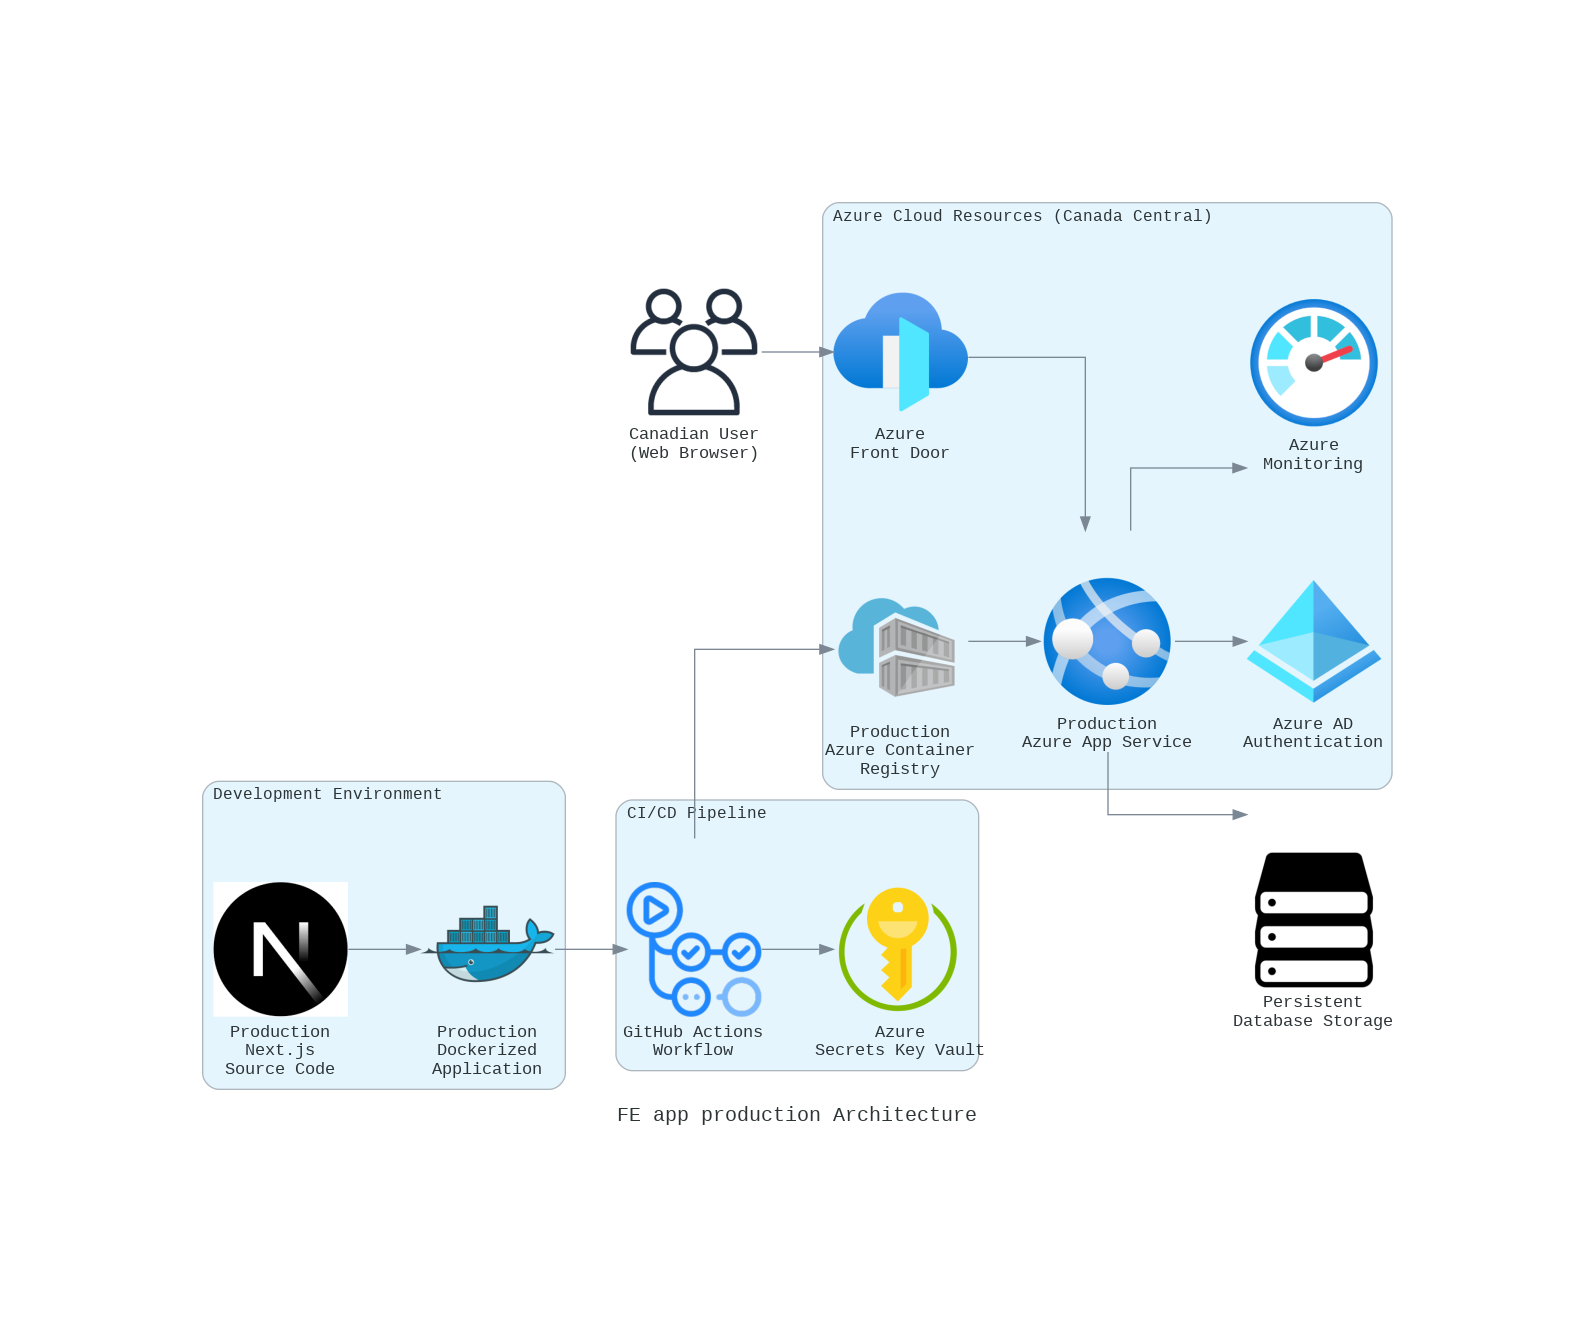

In [ ]:
from IPython.display import Image
Image(filename='fe_app_production_architecture.png')
